# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간 추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초
* 조사와 같이 의미를 별로 담고있지 않은 불용어는 제외
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음
* 너무 빈도가 높아서 오히려 방해가 되는 것도 있음. 이것도 제외해야 함

## 한글 폰트 설정
* 실행 후 런타임 재시작 필요

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())
# 파일 위치에 나눔글꼴 설치 후 아래코드 실행해야 경로 찾음
fm._rebuild()
#matplotlibrc 파일 수정함

버전:  3.1.3
설치 위치:  C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\bini\.matplotlib
캐시 위치:  C:\Users\bini\.matplotlib
설정파일 위치:  C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [ ]:
for f in fm.fontManager.ttflist:
    if 'NanumGothic' == f.name:
        print(f'Font: {f.name}, Path: {f.fname}')

In [ ]:
#테스트코드1

## 폰트 경로
font_path = 'C:/Users/bini/anaconda3/envs/anaconda/lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
 
## FontProperties 인스턴스 생성
font_prop = fm.FontProperties(fname=font_path)
 
## 폰트 이름
font_name = font_prop.get_name()
 
## 폰트 일괄 설정
mat.rc('font',family=font_name)
 
## 예제용 데이터
frequency = [10,11,5,8,11] ## 빈도수
label = ['가','나','다','라','마'] ## 그룹
 
## 시각화 하기
fig = plt.figure(figsize=(10,10))
 
xpos = list(range(len(frequency))) ## 네모 바가 그려질 x 좌표
 
plt.bar(xpos, height=frequency) ## 바차트 그리기
plt.xticks(xpos, label) ## 바차트 눈금 설정
plt.title('그룹별 빈도수')
plt.show()

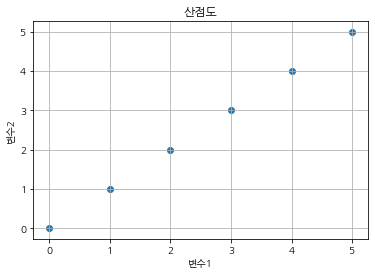

In [3]:
#테스트코드 2

plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

## 네이버 영화 리뷰 데이터
* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [ ]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw : 
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

## 형태소 분석을 이용한 명사 추출
* 형태소 분석기 Mecab으로 명사만 추출

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

nouns = []
for review in reviews : 
    for noun in tagger.nouns(review):
        nouns.append(noun)

print(nouns[:10])

## 불용어(Stopwords) 사전 만들기
* 형태소 분석을 통해 조사, 접속사 등을 제거 가능
* 하지만 한국어에는 명사에도 상당히 많은 불용어가 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)

In [ ]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

## 불용어를 제외하여 형태소 분석 수행
* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [ ]:
nouns = []
for review in reviews :
    for noun in tagger.nouns(review) :
        if noun not in stop_words :
            nouns.append(noun)
            
nouns[:10]

## 단어 빈도수 측정
* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter`함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
nouns_counter

In [ ]:
top_nouns = dict(nouns_counter.most_common(10))
top_nouns

## 단어 빈도 시각화
* 가장 간단하게는

In [ ]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()